# 0. Data import and Check

AtsuyaKobayashi

---

Hundling data via pandas and visualization with matplotlib

In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
importlib.reload(setup)

matplotlib lang set to Ja, using IPA-Gothic font.
imported DataFrames from SSDSE.csv


,地域コード,都道府県,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,...,1872,43,28,215,131,777,185,672,45,3494
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,...,821,19,12,84,79,301,106,359,21,1394
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,...,1840,74,36,243,179,1280,253,826,62,5405
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,...,669,7,6,53,46,284,63,191,10,986


<module 'setup' from '/Users/atsuya/Documents/ssdse-analysis/setup.py'>

In [64]:
whos

Variable         Type        Data/Info
--------------------------------------
f_per_capita     function    <function <lambda> at 0x1a16f100d0>
importlib        module      <module 'importlib' from <...>6/importlib/__init__.py'>
mpl              module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np               module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os               module      <module 'os' from '/Users<...>1.0/lib/python3.6/os.py'>
pd               module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt              module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
random_scatter   function    <function random_scatter at 0x1a1dea5840>
setup            module      <module 'setup' from '/Us<...>ssdse-analysis/setup.py'>
ssdse            ssdse       <setup.ssdse object at 0x10595b908>


In [66]:
ssdse.per_capita.head()

,地域コード,都道府県,市区町村,人口総数,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,1.0,0.466418,0.533582,0.992537,0.462792,0.529745,...,0.004673,0.000193,0.000092,0.000675,0.000634,0.003287,0.001085,0.002569,0.000132,0.012824
1,R01202,北海道,函館市,265979,1.0,0.452577,0.547423,0.994579,0.450483,0.544096,...,0.007038,0.000162,0.000105,0.000808,0.000493,0.002921,0.000696,0.002527,0.000169,0.013136
2,R01203,北海道,小樽市,121924,1.0,0.450978,0.549022,0.995825,0.448821,0.547005,...,0.006734,0.000156,0.000098,0.000689,0.000648,0.002469,0.000869,0.002944,0.000172,0.011433
3,R01204,北海道,旭川市,339605,1.0,0.460541,0.539459,0.988437,0.455576,0.532860,...,0.005418,0.000218,0.000106,0.000716,0.000527,0.003769,0.000745,0.002432,0.000183,0.015916
4,R01205,北海道,室蘭市,88564,1.0,0.487139,0.512861,0.995924,0.484791,0.511133,...,0.007554,0.000079,0.000068,0.000598,0.000519,0.003207,0.000711,0.002157,0.000113,0.011133


#### ランキング的な

In [23]:
ssdse.ssdse.sort_values("人口総数", ascending=False).head(5)

,地域コード,都道府県,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
689,R14100,神奈川県,横浜市,3724844,1855985,1868859,3623330,1803061,1820269,468535,...,13155,488,114,2946,2082,8144,3324,9623,621,51369
1112,R27100,大阪府,大阪市,2691185,1302562,1388623,2497380,1205611,1291769,295298,...,26145,556,183,3403,2261,9182,2964,10336,349,39264
984,R23100,愛知県,名古屋市,2295638,1133640,1161998,2213811,1095360,1118451,282497,...,16862,381,119,2049,1436,7008,2255,6004,382,39500
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,9124,377,179,1317,1237,6418,2118,5015,258,25037
1468,R40130,福岡県,福岡市,1538681,726666,812015,1478656,696551,782105,199923,...,9778,252,103,1493,1018,5851,2179,4227,196,30681


In [24]:
ssdse.ssdse.sort_values("事業所数（教育，学習支援業）", ascending=False).head(5)

,地域コード,都道府県,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,...,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
689,R14100,神奈川県,横浜市,3724844,1855985,1868859,3623330,1803061,1820269,468535,...,13155,488,114,2946,2082,8144,3324,9623,621,51369
984,R23100,愛知県,名古屋市,2295638,1133640,1161998,2213811,1095360,1118451,282497,...,16862,381,119,2049,1436,7008,2255,6004,382,39500
1112,R27100,大阪府,大阪市,2691185,1302562,1388623,2497380,1205611,1291769,295298,...,26145,556,183,3403,2261,9182,2964,10336,349,39264
1155,R28100,兵庫県,神戸市,1537272,726700,810572,1480458,698836,781622,185084,...,11340,248,100,1564,934,4869,1243,5014,210,21502
1468,R40130,福岡県,福岡市,1538681,726666,812015,1478656,696551,782105,199923,...,9778,252,103,1493,1018,5851,2179,4227,196,30681


### 変数の種類

In [35]:
print(ssdse.per_capita.columns.values)

['地域コード' '都道府県' '市区町村' '人口総数' '人口総数' '人口総数（男）' '人口総数（女）' '日本人人口'
 '日本人人口（男）' '日本人人口（女）' '１５歳未満人口' '１５歳未満人口（男）' '１５歳未満人口（女）' '１５〜６４歳人口'
 '１５〜６４歳人口（男）' '１５〜６４歳人口（女）' '６５歳以上人口' '６５歳以上人口（男）' '６５歳以上人口（女）' '７５歳以上人口'
 '７５歳以上人口（男）' '７５歳以上人口（女）' '外国人人口' '出生数' '死亡数' '転入者数' '転出者数' '世帯数' '一般世帯数'
 '一般世帯人員数' '核家族世帯数' '単独世帯数' '６５歳以上の世帯員のいる核家族世帯数' '高齢夫婦のみの世帯数'
 '高齢単身世帯数（６５歳以上の者１人）' '婚姻件数' '離婚件数' '総面積（北方地域及び竹島を除く）' '可住地面積' '事業所総数'
 '事業所数（農業，林業）' '事業所数（建設業）' '事業所数（製造業）' '事業所数（電気・ガス・熱供給・水道業）' '事業所数（情報通信業）'
 '事業所数（運輸業，郵便業）' '事業所数（卸売業，小売業）' '事業所数（金融業，保険業）' '事業所数（不動産業，物品賃貸業）'
 '事業所数（学術研究，専門・技術サービス業）' '事業所数（宿泊業，飲食サービス業）' '事業所数（生活関連サービス業，娯楽業）'
 '事業所数（教育，学習支援業）' '事業所数（医療，福祉）' '事業所数（複合サービス事業）' '事業所数（サービス業（他に分類されないもの））'
 '事業所数（公務（他に分類されるものを除く））' '第１次産業事業所数' '第２次産業事業所数' '第３次産業事業所数' '従業者総数'
 '従業者数（農業，林業）' '従業者数（建設業）' '従業者数（製造業）' '従業者数（電気・ガス・熱供給・水道業）' '従業者数（情報通信業）'
 '従業者数（運輸業，郵便業）' '従業者数（卸売業，小売業）' '従業者数（金融業，保険業）' '従業者数（不動産業，物品賃貸業）'
 '従業者数（学術研究，専門・技術サービス業）' '従業者数（宿泊業，飲食サービス業）' '従業者数（生活関連サービス業，娯楽業）'
 '従業者数（教育，学習支援業）'

## 試しにプロットしてみる。

上記の変数からランダムで2つ選択してプロット。
相関係数の算出と線形回帰結果のプロット。

In [56]:
ssdse.per_capita['大型小売店数'].values.reshape(-1, 1)
np.isfinite(ssdse.per_capita['大型小売店数'].values)

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
def random_scatter(row: int = 3, col: int = 3):


    import random
    from sklearn.linear_model import LinearRegression

    fig , axes = plt.subplots(row, col, figsize=(5*col, 5*row))


    for n in range(row * col):
        area = axes[n // col][n % col]

        x, y = random.sample(list(ssdse.per_capita.columns.values[3:]), 2)

        area.scatter(x=x, y=y, data=ssdse.per_capita, s=12, alpha=0.3,
                     label="Data of each Pref.")
        area.set_xlabel(x)
        area.set_ylabel(y)

        reg = LinearRegression()
        reg.fit(ssdse.per_capita[x].values.reshape(-1, 1), ssdse.per_capita[y])

        area.plot(np.linspace(0, ssdse.per_capita[x].max(), 10),
                  reg.predict(np.linspace(0, ssdse.per_capita[x].max(), 10).reshape(-1, 1)),
                  color="indigo", label="Linear Regression")


        corr_coef = np.corrcoef(x=ssdse.per_capita[x],
                                y=ssdse.per_capita[y])[0][1].round(3)

        area.legend(title="回帰: y={}x+({})\n相関係数: {}"
                    .format(round(reg.coef_[0], 2),
                            round(reg.intercept_, 2), corr_coef), 
                    fontsize=10, fancybox=False)

    fig.tight_layout()

/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

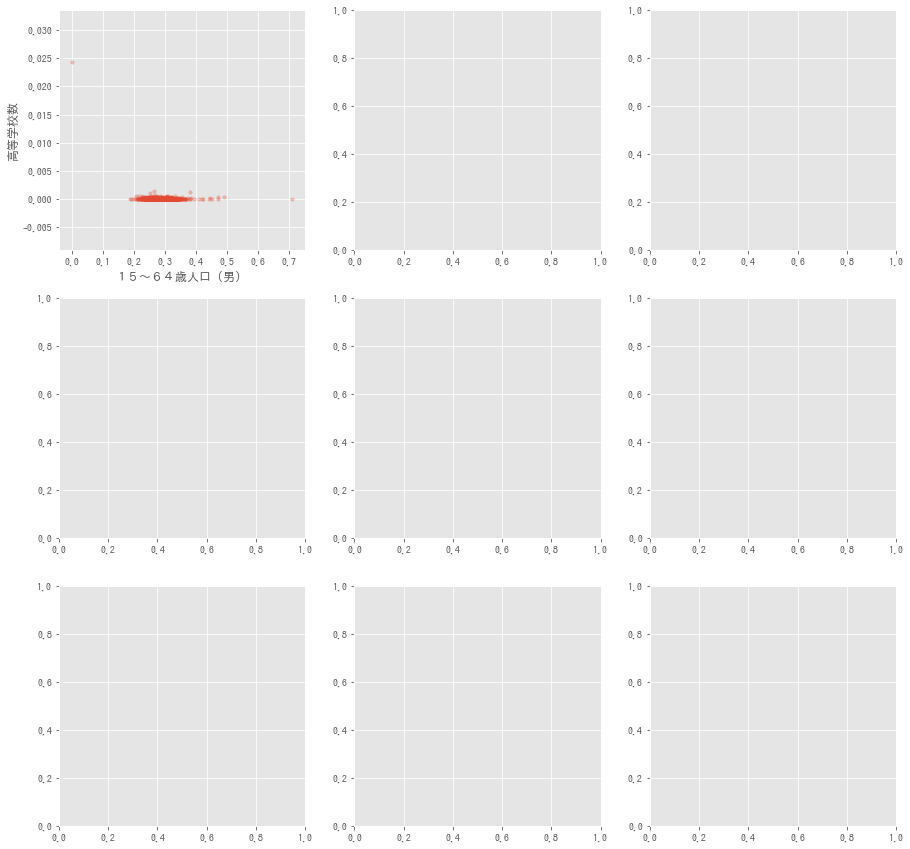

In [72]:
random_scatter()

In [ ]:
random_scatter(10, 10)